### [Delhi Metro Network Analysis: Case Study](https://statso.io/metro-network-analysis-case-study/)

In [487]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [488]:
df = pd.read_csv('Delhi-Metro-Network.csv', parse_dates=['Opening Date'])

In [489]:
df.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [490]:
# checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64


In [491]:
data_types = df.dtypes
print(data_types)

Station ID                           int64
Station Name                        object
Distance from Start (km)           float64
Line                                object
Opening Date                datetime64[ns]
Station Layout                      object
Latitude                           float64
Longitude                          float64
dtype: object


### Network Visualization
#### Map the stations to visualize the coverage and distribution of the metro network across Delhi.


In [492]:
# defining a color scheme for the metro lines
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

In [493]:
delhi_map_with_line_tooltip = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

# adding colored markers for each metro station with line name in tooltip
for index, row in df.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')  # Default color is black if line not found in the dictionary
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color)
    ).add_to(delhi_map_with_line_tooltip)
    
# Displaying the updated map
delhi_map_with_line_tooltip

### Line Analysis
#### Examine characteristics of different metro lines, including station count and average distances between stations.

In [494]:
stations_per_line_df = df['Line'].value_counts().sort_index().reset_index()
stations_per_line_df.columns = ['Metro Line', 'Number of Stations']
stations_per_line_df

,Metro Line,Number of Stations
0,Aqua line,21
1,Blue line,49
2,Blue line branch,8
3,Gray line,3
4,Green line,21
5,Green line branch,3
6,Magenta line,25
7,Orange line,6
8,Pink line,38
9,Rapid Metro,11


In [495]:
# calculating the total distance of each metro line (max distance from start)
total_dist_per_line_df = df.groupby('Line')['Distance from Start (km)'].max().sort_index().reset_index()
total_dist_per_line_df.columns = ['Metro Line', 'Total Distance per line (km)']
total_dist_per_line_df

,Metro Line,Total Distance per line (km)
0,Aqua line,27.1
1,Blue line,52.7
2,Blue line branch,8.1
3,Gray line,3.9
4,Green line,24.8
5,Green line branch,2.1
6,Magenta line,33.1
7,Orange line,20.8
8,Pink line,52.6
9,Rapid Metro,10.0


In [496]:
line_analysis = pd.merge(stations_per_line_df, total_dist_per_line_df, on='Metro Line', how='inner')
line_analysis

,Metro Line,Number of Stations,Total Distance per line (km)
0,Aqua line,21,27.1
1,Blue line,49,52.7
2,Blue line branch,8,8.1
3,Gray line,3,3.9
4,Green line,21,24.8
5,Green line branch,3,2.1
6,Magenta line,25,33.1
7,Orange line,6,20.8
8,Pink line,38,52.6
9,Rapid Metro,11,10.0


In [497]:
line_analysis['Avg Distance Between Stations (km)'] = line_analysis['Total Distance per line (km)'] / (line_analysis['Number of Stations'] - 1)
line_analysis

,Metro Line,Number of Stations,Total Distance per line (km),Avg Distance Between Stations (km)
0,Aqua line,21,27.1,1.355000
1,Blue line,49,52.7,1.097917
2,Blue line branch,8,8.1,1.157143
3,Gray line,3,3.9,1.950000
4,Green line,21,24.8,1.240000
5,Green line branch,3,2.1,1.050000
6,Magenta line,25,33.1,1.379167
7,Orange line,6,20.8,4.160000
8,Pink line,38,52.6,1.421622
9,Rapid Metro,11,10.0,1.000000


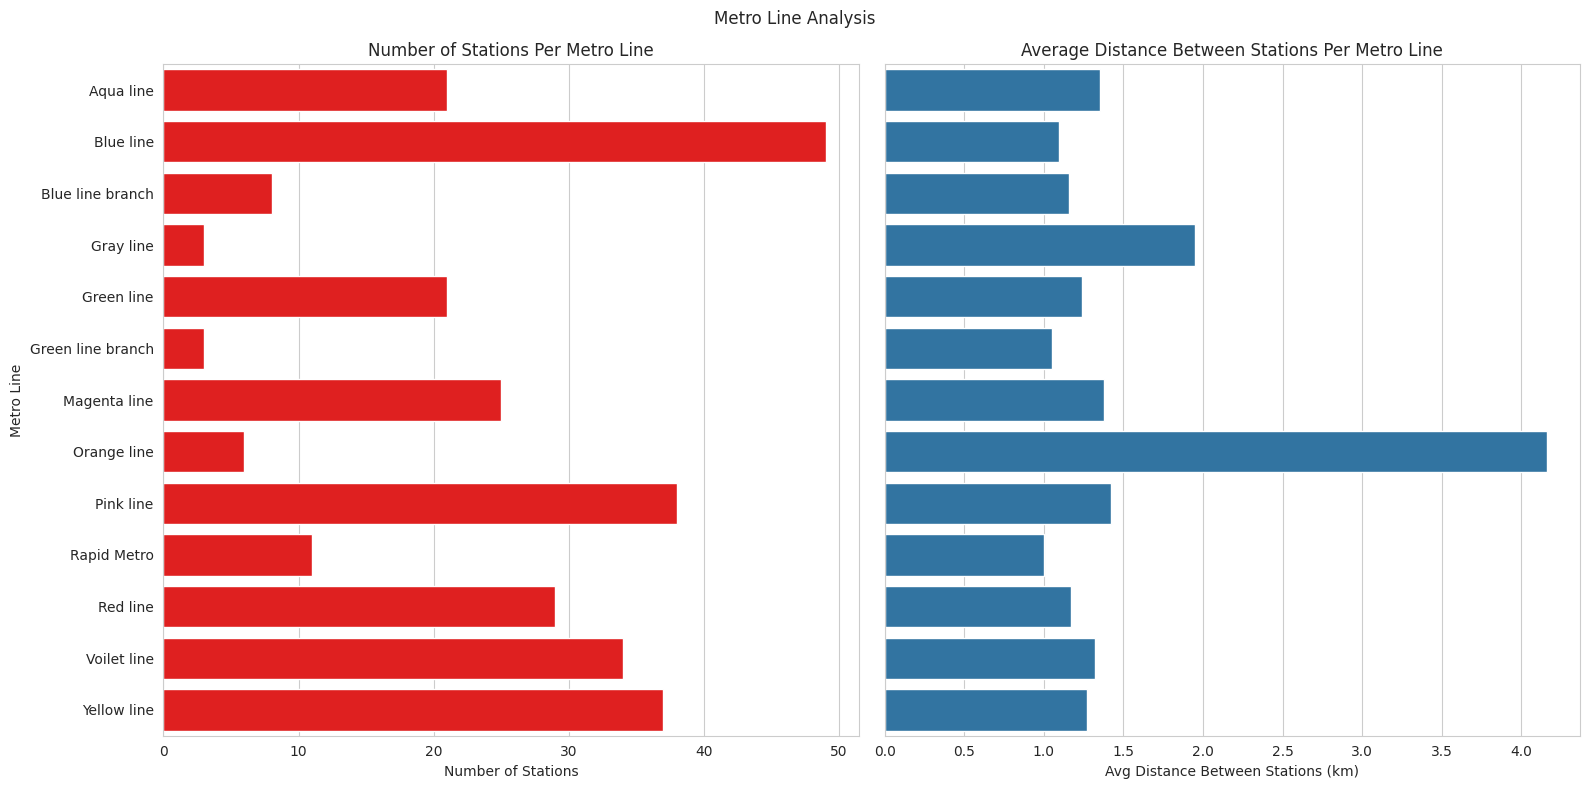

In [498]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 8))

# First subplot
sns.barplot(ax=ax1, x=line_analysis['Number of Stations'], y=line_analysis['Metro Line'], color='red')
ax1.set_title('Number of Stations Per Metro Line')

# Second subplot
sns.barplot(ax=ax2, x=line_analysis['Avg Distance Between Stations (km)'], y=line_analysis['Metro Line'])
ax2.set_title('Average Distance Between Stations Per Metro Line')

plt.suptitle('Metro Line Analysis')
plt.tight_layout()
plt.show()

### Station Layout Analysis
#### Analyze the types of station layouts and their distribution across the network.

In [499]:
layout_counts = df['Station Layout'].value_counts()
layout_counts

Station Layout
Elevated       214
Underground     68
At-Grade         3
Name: count, dtype: int64

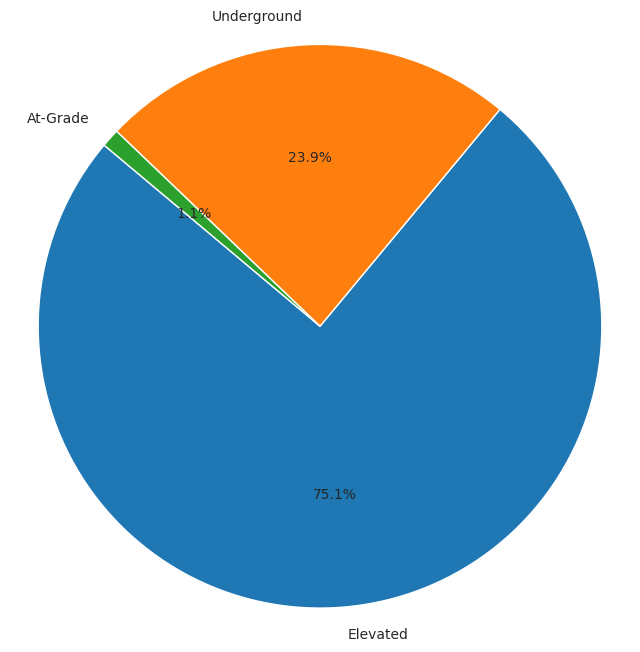

In [500]:
# Create a pie chart
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid") # Set the style
sns.color_palette("pastel") # Set color palette
plt.pie(layout_counts.values, labels=layout_counts.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.plot();

### Temporal Analysis
#### Analyze the opening dates of stations to see how the metro network has expanded over time.

In [507]:
df['Opening Year'] = df['Opening Date'].dt.year
stations_per_year_df = df['Opening Year'].value_counts().sort_index().reset_index()
stations_per_year_df.columns = ['Year', 'Number of Stations']
stations_per_year_df

,Year,Number of Stations
0,2002,6
1,2003,4
2,2004,11
3,2005,28
4,2006,9
5,2008,3
6,2009,17
7,2010,54
8,2011,13
9,2013,5


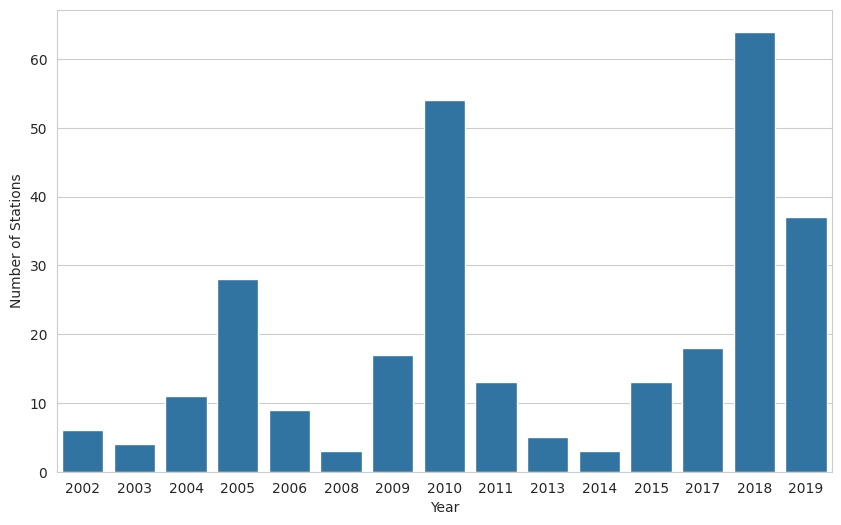

In [511]:
plt.figure(figsize=(10,6))
sns.barplot(stations_per_year_df, x=stations_per_year_df['Year'], y=stations_per_year_df['Number of Stations'])
plt.show()